In [15]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
from data_loader import SurgicalPhaseDataset 

In [11]:
# Define the dataset path
CSV_FILE = "../../data/splits/train_split.csv"
IMAGE_DIR = "/vol/scratch/SoC/misc/2024/sc22jg/frames/" 

In [12]:
df = pd.read_csv(CSV_FILE)

In [23]:
PHASE_TO_INDEX = {
    "unknown": 0,
    "pull through": 1,
    "placing rings": 2,
    "suture pick up": 3,
    "suture pull through": 4,
    "suture tie": 5,
    "uva pick up": 6,
    "uva pull through": 7,
    "uva tie": 8,
    "placing rings 2 arms": 9,
    "1 arm placing": 10,
    "2 arms placing": 11,
    "pull off": 12
}

In [13]:

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.RandomHorizontalFlip(p=1.0),  # Always flip for visualization
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [16]:

# Load dataset and create DataLoader
dataset = SurgicalPhaseDataset(csv_file=CSV_FILE, image_dir=IMAGE_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get a sample batch
sample_image, sample_label = next(iter(dataloader))


---- Image Information ----
File Path       : /vol/scratch/SoC/misc/2024/sc22jg/frames/0003_24/frame_006830_suture tie.jpg
Original Size   : (480, 320) (width x height)
Image Mode      : RGB
Transformed Size: torch.Size([3, 224, 224])
Label (Int)     : 5
Label (Name)    : suture tie
Tensor Min      : -2.1008
Tensor Max      : 2.6051
Tensor Mean     : -0.1435
Tensor Std      : 1.0923
--------------------------



In [17]:

# Reverse normalization for visualization
unnormalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)
transformed_image_un = unnormalize(sample_image[0]).clip(0, 1)

In [18]:
# Convert tensor back to PIL Image for visualization
transformed_image_pil = transforms.ToPILImage()(transformed_image_un)

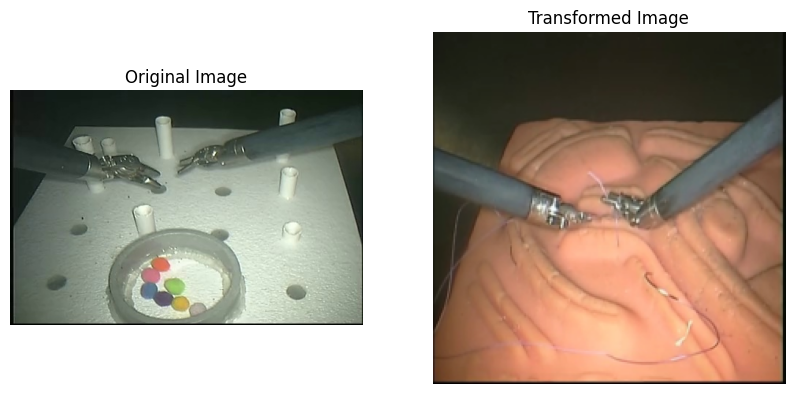

In [19]:

# Plot original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(Image.open(os.path.join(IMAGE_DIR, dataset.data.iloc[0]["file_path"])).convert("RGB"))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(transformed_image_pil)
ax[1].set_title("Transformed Image")
ax[1].axis("off")

plt.show()


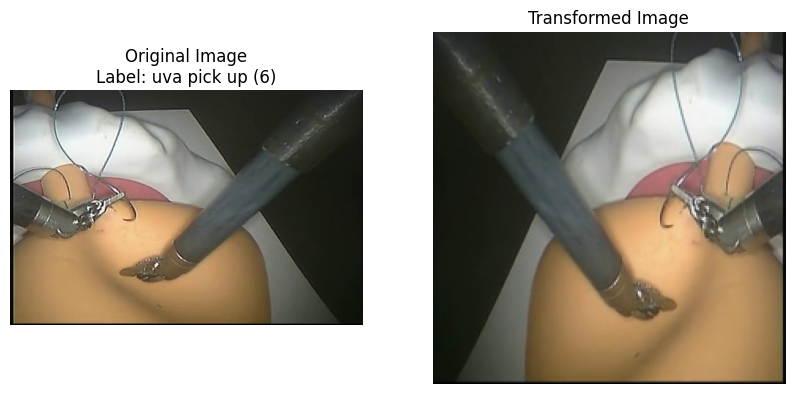

In [28]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from data_loader import SurgicalPhaseDataset 

# Define phase-to-index mapping manually
PHASE_TO_INDEX = {
    "unknown": 0,
    "pull through": 1,
    "placing rings": 2,
    "suture pick up": 3,
    "suture pull through": 4,
    "suture tie": 5,
    "uva pick up": 6,
    "uva pull through": 7,
    "uva tie": 8,
    "placing rings 2 arms": 9,
    "1 arm placing": 10,
    "2 arms placing": 11,
    "pull off": 12
}

# Define dataset and transformations
CSV_FILE = "../../data/splits/train_split.csv"
IMAGE_DIR = "/vol/scratch/SoC/misc/2024/sc22jg/frames/"  

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.RandomHorizontalFlip(p=1.0),  # Always flip for visualization
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load dataset and create DataLoader
dataset = SurgicalPhaseDataset(csv_file=CSV_FILE, image_dir=IMAGE_DIR, transform=train_transforms)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Select a fixed index from the dataset (not using dataloader shuffling)
sample_idx = torch.randint(0, len(dataset), (1,)).item()

# Get image path from dataset
image_path = os.path.join(IMAGE_DIR, dataset.data.iloc[sample_idx]["file_path"])

# Load original image before applying transforms
original_image = Image.open(image_path).convert("RGB")

# Apply transformations manually to the same image
transformed_image = train_transforms(original_image)

# Reverse normalization for visualization
unnormalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)
transformed_image_un = unnormalize(transformed_image).clip(0, 1)

# Convert transformed tensor back to PIL image for visualization
transformed_image_pil = transforms.ToPILImage()(transformed_image_un)

# Get phase label
label_int = dataset.data.iloc[sample_idx]["phase"]
label_name = [key for key, value in PHASE_TO_INDEX.items() if value == label_int][0]  # Reverse lookup

# Plot original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original_image)
ax[0].set_title(f"Original Image\nLabel: {label_name} ({label_int})")
ax[0].axis("off")

ax[1].imshow(transformed_image_pil)
ax[1].set_title("Transformed Image")
ax[1].axis("off")

plt.show()


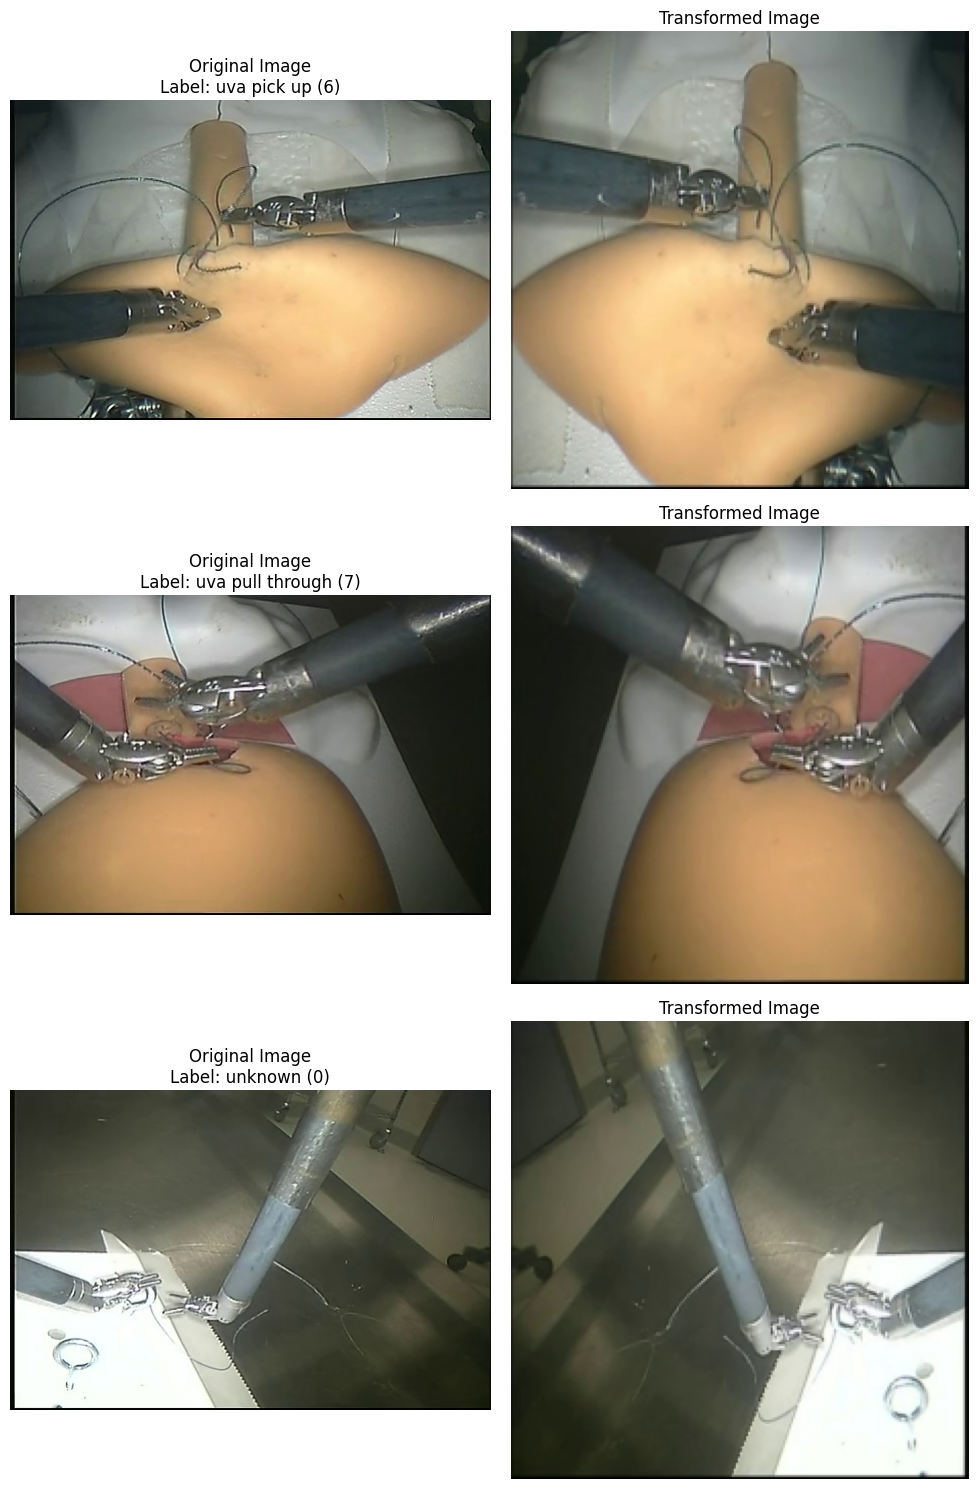

In [33]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from data_loader import SurgicalPhaseDataset  

# Define phase-to-index mapping manually
PHASE_TO_INDEX = {
    "unknown": 0,
    "pull through": 1,
    "placing rings": 2,
    "suture pick up": 3,
    "suture pull through": 4,
    "suture tie": 5,
    "uva pick up": 6,
    "uva pull through": 7,
    "uva tie": 8,
    "placing rings 2 arms": 9,
    "1 arm placing": 10,
    "2 arms placing": 11,
    "pull off": 12
}

# Define dataset and transformations
CSV_FILE = "../../data/splits/train_split.csv"
IMAGE_DIR = "/vol/scratch/SoC/misc/2024/sc22jg/frames/"  

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.RandomHorizontalFlip(p=1.0),  # Always flip for visualization
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load dataset
dataset = SurgicalPhaseDataset(csv_file=CSV_FILE, image_dir=IMAGE_DIR, transform=train_transforms)

# Select three random samples
sample_indices = torch.randint(0, len(dataset), (3,)).tolist()

# Set up the figure for visualization
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

for i, sample_idx in enumerate(sample_indices):
    # Get image path from dataset
    image_path = os.path.join(IMAGE_DIR, dataset.data.iloc[sample_idx]["file_path"])

    # Load original image before applying transforms
    original_image = Image.open(image_path).convert("RGB")

    # Apply transformations manually to the same image
    transformed_image = train_transforms(original_image)

    # Reverse normalization for visualization
    unnormalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    transformed_image_un = unnormalize(transformed_image).clip(0, 1)

    # Convert transformed tensor back to PIL image for visualization
    transformed_image_pil = transforms.ToPILImage()(transformed_image_un)

    # Get phase label
    label_int = dataset.data.iloc[sample_idx]["phase"]
    label_name = [key for key, value in PHASE_TO_INDEX.items() if value == label_int][0]  # Reverse lookup

    # Plot original and transformed images
    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title(f"Original Image\nLabel: {label_name} ({label_int})")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(transformed_image_pil)
    axes[i, 1].set_title("Transformed Image")
    axes[i, 1].axis("off")

# Adjust layout and display the images

output_path = "../../reports/visuals/frames/frame_conversion.png"

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()
